In [25]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime
import dslabs_functions as ds

In [2]:
path = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\cybersec_dataset\\cybersecurity_attacks.csv"
df = pd.read_csv(path, na_values="")
df_backup = df

In [3]:
print(df.head())

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

(40000, 25)


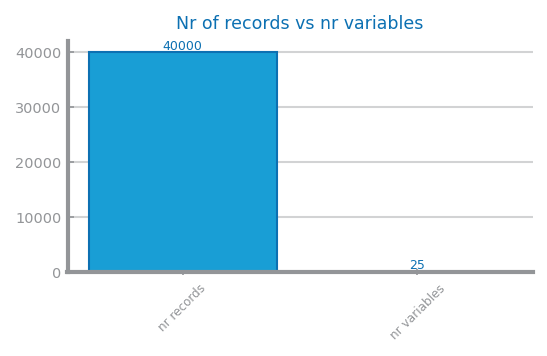

In [31]:
# Figure 1 - Data Dimensionality records vs variables
data = df
print(data.shape)
plt.figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
ds.plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
file_tag = "cyber_attacks"
plt.savefig(f"images/{file_tag}_records_variables.png")
plt.show()

{'numeric': ['Timestamp', 'Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores'], 'binary': ['Packet Type', 'Attack Signature', 'Log Source'], 'date': [], 'symbolic': ['Source IP Address', 'Destination IP Address', 'Protocol', 'Traffic Type', 'Payload Data', 'Malware Indicators', 'Alerts/Warnings', 'Attack Type', 'Action Taken', 'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']}


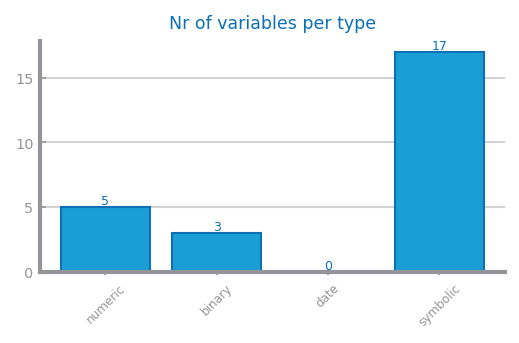

Timestamp                 datetime64[ns]
Source IP Address               category
Destination IP Address          category
Source Port                        int64
Destination Port                   int64
Protocol                        category
Packet Length                      int64
Packet Type                       object
Traffic Type                    category
Payload Data                    category
Malware Indicators              category
Anomaly Scores                   float64
Alerts/Warnings                 category
Attack Type                     category
Attack Signature                  object
Action Taken                    category
Severity Level                  category
User Information                category
Device Information              category
Network Segment                 category
Geo-location Data               category
Proxy Information               category
Firewall Logs                   category
IDS/IPS Alerts                  category
Log Source      

In [35]:
# Figure 2 - Data Dimensionality - Variables/type
variable_types: dict[str, list] = ds.get_variable_types(data)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

plt.figure(figsize=(4, 2))
ds.plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
plt.savefig(f"images/{file_tag}_variable_types.png")
plt.show()

symbolic: list[str] = variable_types["symbolic"]
data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))
data.dtypes

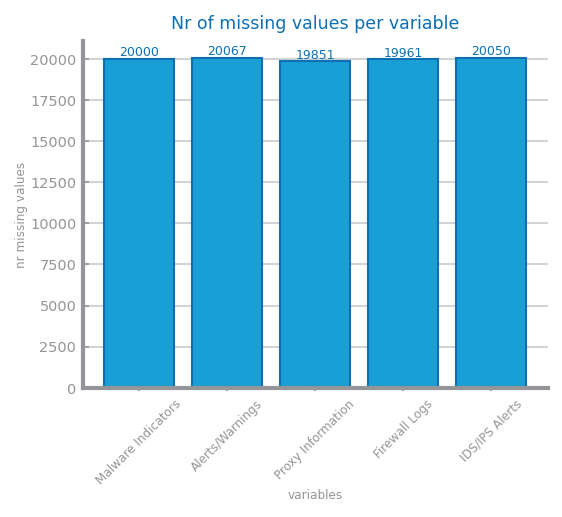

In [33]:
# Figure 3 - Data Dimensionality - #Missing/Variables
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plt.figure()
ds.plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
plt.savefig(f"images/{file_tag}_mv.png")
plt.show()

In [5]:
df_2 = pd.DataFrame(np.unique(df["Protocol"]),columns=["Protocol"],)
print(df_2)

  Protocol
0     ICMP
1      TCP
2      UDP


In [6]:
df_3 = df["Protocol"].unique()
print(df_3)

['ICMP' 'UDP' 'TCP']


In [7]:
print(df["Protocol"].value_counts(dropna=False))
print("")
print(df["Log Source"].value_counts(dropna=False))
print("")
print(df["Severity Level"].value_counts(dropna=False))
print("")
print(df["Network Segment"].value_counts(dropna=False))
print("")
print(df["Geo-location Data"].value_counts(dropna=False))
print("")
print(df["Firewall Logs"].value_counts(dropna=False)) #-irrelevant
print("")
print(df["Alerts/Warnings"].value_counts(dropna=False)) #-irrelevant
print("")
print(df["IDS/IPS Alerts"].value_counts(dropna=False))
print("")
print(df["Malware Indicators"].value_counts(dropna=False))

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64

Geo-location Data
Ghaziabad, Meghalaya           16
Kalyan-Dombivli, Jharkhand     15
Ghaziabad, Uttarakhand         14
Ghaziabad, Tripura             14
Motihari, Odisha               13
                               ..
Tumkur, Mizoram                 1
Ongole, Tamil Nadu              1
Dindigul, Arunachal Pradesh     1
Hyderabad, Uttar Pradesh        1
Junagadh, Gujarat               1
Name: count, Length: 8723, dtype: int64

Firewall Logs
Log Data    20039
NaN         19961
Name: count, dtype: int64

Alerts/Warnings
NaN                20067
Alert Triggered    19933
Name: count, dtype: int64

IDS/IPS Alerts
NaN           20050
Alert Data    19950


In [8]:
print(df["Severity Level"].value_counts(dropna=False))
print("")
print(df["Action Taken"].value_counts())
print("")
print(df["Attack Type"].value_counts())
print("")
print(df["Traffic Type"].value_counts())
print("")
print(df["Attack Type"].value_counts())

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


In [9]:
print(df["Anomaly Scores"].value_counts(dropna=False))
df_4 = df["Anomaly Scores"].unique()
print(df_4)

Anomaly Scores
93.76    12
57.18    12
15.39    12
56.92    12
28.67    12
         ..
81.90     1
59.59     1
19.08     1
13.78     1
63.96     1
Name: count, Length: 9826, dtype: int64
[28.67 51.5  87.42 ... 95.85 74.68  6.58]


In [10]:
df_clean = df_backup.drop(columns=["Payload Data", "Log Source", "Malware Indicators","Packet Length", "Network Segment", "Firewall Logs"], axis=1)
for i in range(0, 40000):
    if type(df_clean["Proxy Information"][i])==str:
        df_clean.loc[i,"Proxy Information"]= 0
    else:
        df_clean.loc[i,"Proxy Information"]= 1

In [11]:
# Move to an auxiliary variable so that cells can be run isolated without issues
df_clean_aux = df_clean
# Divide Source IP in 4 columns (1/byte)
df_clean_aux[["S_IP1", "S_IP2", "S_IP3", "S_IP4"]]  = df_clean_aux["Source IP Address"].str.split(".", expand=True)
# Re-order columns
cols = list(df_clean_aux.columns)
cols = cols[0:1:]+ cols[-4::1] + cols[1:-4:] 
df_clean_aux = df_clean_aux[cols]
df_clean = df_clean_aux

# Divide Destination IP in 4 columns (1/byte)
df_clean_aux[["D_IP1", "D_IP2", "D_IP3", "D_IP4"]]  = df_clean_aux["Destination IP Address"].str.split(".", expand=True)
# Re-order columns
cols = list(df_clean_aux.columns)
cols = cols[0:5:]+ cols[-4::1] + cols[5:-4:] 
df_clean_aux = df_clean_aux[cols]
df_clean = df_clean_aux

df_clean_aux[["Year", "Month", "Day_garbage"]]  = df_clean_aux["Timestamp"].str.split("-", expand=True)
# Re-order columns
cols = list(df_clean_aux.columns)
cols = cols[0:1:]+ cols[-3::1] + cols[1:-3:]
df_clean_aux = df_clean_aux[cols]
df_clean = df_clean_aux

df_clean_aux[["Day", "Time"]]  = df_clean_aux["Day_garbage"].str.split(" ", expand=True)
cols = list(df_clean_aux.columns)
cols = cols[0:3:]+ cols[-2::1] + cols[3:-2:]
df_clean_aux = df_clean_aux[cols]
df_clean = df_clean_aux

df_clean_aux[["Hour", "garbage", "garbage2"]]  = df_clean_aux["Time"].str.split(":", expand=True)
cols = list(df_clean_aux.columns)
cols = cols[0:5:]+ cols[-3::1] + cols[5:-3:]
df_clean_aux = df_clean_aux[cols]

df_clean_aux = df_clean_aux.drop(columns=["Day_garbage", "Timestamp", "Time", "garbage", "garbage2"], axis=1)
df_clean = df_clean_aux

In [12]:
# Creating weekday category initialized as 0
df_clean_aux = df_clean
df_clean_aux[["Weekday"]]=0
cols = list(df_clean_aux.columns)
cols = cols[0:3:]+ cols[-1::1] + cols[3:-1:]
df_clean_aux = df_clean_aux[cols]

# Filling category Weekday with 1-7 range (1 - Monday, 7 - Sunday)
datetime.datetime.today()
for i in range(0, 40000):
    df_clean_aux.loc[i,"Weekday"] = datetime.datetime(int(df_clean_aux["Year"][i]), int(df_clean_aux["Month"][i]), int(df_clean_aux["Day"][i]),1,0).isoweekday()
# Moving updated matrix back to df_clean
df_clean = df_clean_aux

In [13]:
df_clean = df_clean.drop(columns=["Year", "Month", "Day", "Source IP Address", "Destination IP Address" ], axis=1)

In [14]:
# Transform Alerts/Warnings, Attack Type, Attack Signature, Action Taken, Severity Level, Alerts/Warnings, IDS/IPS Alerts
for i in range(0, 40000):
    if df_clean["Attack Type"][i] == "Malware":
        df_clean.loc[i,"Attack Type"]= 1
    else:
        if df_clean["Attack Type"][i] == "DDos":
            df_clean.loc[i,"Attack Type"]= 2
        else:
            # Intrusion
            df_clean.loc[i,"Attack Type"]= 3

    if df_clean["Attack Signature"][i] == "Known Pattern A":
        df_clean.loc[i,"Attack Signature"]= 1
    else:
        if df_clean["Attack Signature"][i] == "Known Pattern B":
            df_clean.loc[i,"Attack Signature"]= 2
        else:
            # Known Pattern C
            df_clean.loc[i,"Attack Signature"]= 3
            
    if df_clean["Action Taken"][i] == "Ignored":
        df_clean.loc[i,"Action Taken"]= 1
    else:
        if df_clean["Action Taken"][i] == "Logged":
            df_clean.loc[i,"Action Taken"]= 2
        else:
            # Blocked
            df_clean.loc[i,"Action Taken"]= 3

    if df_clean["Severity Level"][i] == "Low":
        df_clean.loc[i,"Severity Level"]= 1
    else:
        if df_clean["Severity Level"][i] == "Medium":
            df_clean.loc[i,"Severity Level"]= 2
        else:
            # High
            df_clean.loc[i,"Severity Level"]= 3

    if df_clean["Alerts/Warnings"][i] == "Alert Triggered":
        df_clean.loc[i,"Alerts/Warnings"]= 1
    else:
        df_clean.loc[i,"Alerts/Warnings"]= 0

    if df_clean["IDS/IPS Alerts"][i] == "Alert Data":
        df_clean.loc[i,"IDS/IPS Alerts"]= 1
    else:
        df_clean.loc[i,"IDS/IPS Alerts"]= 0


In [15]:
 # Protocol            40000 non-null  object 
 # Packet Type         40000 non-null  object 
 # Traffic Type        40000 non-null  object 
 # Anomaly Scores      40000 non-null  float64

# Malware Indicators
#Protocol
#ICMP    13429
#UDP     13299
#TCP     13272

#print(df["Anomaly Scores"].value_counts(dropna=False))
#df_4 = df["Anomaly Scores"].unique()
#print(df_4)

# Packet type - Data / Control
# Traffic Type - HTTP / DNS / FTP
# Transform Alerts/Warnings, Attack Type, Attack Signature, Action Taken, Severity Level, Alerts/Warnings, IDS/IPS Alerts
#for i in range(0, 40000):
#    if df_clean["Attack Type"][i] == "Malware":
#        df_clean.loc[i,"Attack Type"]= 1
#    else:
#        if df_clean["Attack Type"][i] == "DDos":
#            df_clean.loc[i,"Attack Type"]= 2
#        else:
            # Intrusion
#            df_clean.loc[i,"Attack Type"]= 3



In [16]:
print(df_clean.head())

   Weekday Hour S_IP1 S_IP2 S_IP3 S_IP4 D_IP1 D_IP2 D_IP3 D_IP4  ...  \
0        2   06   103   216    15    12    84     9   164   252  ...   
1        3   07    78   199   217   198    66   191   137   154  ...   
2        7   08    63    79   210    48   198   219    82    17  ...   
3        7   10   163    42   196    10   101   228   192   255  ...   
4        7   13    71   166   185    76   189   243   174   238  ...   

   Alerts/Warnings  Attack Type Attack Signature Action Taken Severity Level  \
0                0            1                2            2              1   
1                0            1                1            3              1   
2                1            3                2            1              1   
3                1            1                2            3              2   
4                1            3                2            3              1   

   User Information                                 Device Information  \
0     Reyans

In [17]:
# convert_dict = {'S_IP1': int, 'S_IP2': int, 'S_IP3': int, 'S_IP4': int, 'D_IP1': int, 'D_IP2': int, 'D_IP3': int, 'D_IP4': int, "Alerts/Warnings": int, "Attack Type": int, "Attack Signature": int, "Action Taken": int, "Severity Level": int, "Proxy Information": int, "IDS/IPS Alerts": int }
# df_clean = df_clean.astype(convert_dict)
df_clean[['S_IP1', 'S_IP2', 'S_IP3', 'S_IP4', 'D_IP1', 'D_IP2', 'D_IP3', 'D_IP4', "Alerts/Warnings", "Attack Type", "Attack Signature", "Action Taken", "Severity Level", "Proxy Information", "IDS/IPS Alerts"]] = df_clean[['S_IP1', 'S_IP2', 'S_IP3', 'S_IP4', 'D_IP1', 'D_IP2', 'D_IP3', 'D_IP4', "Alerts/Warnings", "Attack Type", "Attack Signature", "Action Taken", "Severity Level", "Proxy Information", "IDS/IPS Alerts"]].apply(pd.to_numeric) 
df_clean[["Weekday", "Hour"]] = df_clean[["Weekday", "Hour"]].apply(pd.to_numeric) 
# print(df_clean.info())

In [18]:
# Data too distributed - too many unique cases
df_clean = df_clean.drop(columns=["User Information", "Device Information" ], axis=1)

In [19]:
summary5 = df_clean.describe(include="all")
print(summary5)

             Weekday          Hour         S_IP1         S_IP2        S_IP3  \
count   40000.000000  40000.000000  40000.000000  40000.000000  40000.00000   
unique           NaN           NaN           NaN           NaN          NaN   
top              NaN           NaN           NaN           NaN          NaN   
freq             NaN           NaN           NaN           NaN          NaN   
mean        3.995750     11.507350    111.740000    127.732875    127.49050   
std         2.004515      6.919122     64.534479     74.240689     73.84604   
min         1.000000      0.000000      1.000000      0.000000      0.00000   
25%         2.000000      5.000000     56.000000     63.750000     63.00000   
50%         4.000000     12.000000    111.000000    128.000000    128.00000   
75%         6.000000     17.000000    168.000000    192.000000    191.00000   
max         7.000000     23.000000    223.000000    255.000000    255.00000   

               S_IP4         D_IP1         D_IP2   